In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import csv
from scipy.cluster.hierarchy import dendrogram

In [2]:
def pca(x, y, k):
    x = x.reshape(x.shape[0], -1)
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    standadized_x = (x - mean) / std
    covariance_matrix = np.cov(standadized_x, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    eigenvalues = np.real(eigenvalues)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    sum_eigenvalues = np.sum(sorted_eigenvalues)/100
    sorted_eigenvalues = sorted_eigenvalues / sum_eigenvalues
    final_eigenvectors = sorted_eigenvectors[:, :k]
    cumulative_explained_variance = []
    for i in range(0, k):
        cumulative_explained_variance.append(np.sum(sorted_eigenvalues[:i]))
    final_features = np.dot(final_eigenvectors.T, standadized_x.T).T
    return cumulative_explained_variance, final_features

In [3]:
csv_file_path = './SMAI-Dataset-hc-dataset/new_customers.csv'
with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)
    data = []
    for row in csv_reader:
        data.append(row)
    data = data[1:]
    data = np.array(data)
    data[:, 1] = np.where(data[:, 1] == 'Male', 1, 0)
    data = data.astype(float)
    print((data[:, 1]))

[1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 1.]


In [4]:
class HC:
    def linkages(self, data, linkage_type = "min"):
        np.random.seed(0)
        proximity_matrix = np.random.randn(data.shape[0], data.shape[0])
        for i in range(0, data.shape[0]):
            for j in range(0, data.shape[0]):
                proximity_matrix[i][j] = np.sqrt(np.sum((data[i] - data[j])**2))
        clusters = {}
        linkage_matrix = []
        for i in range(0, data.shape[0]):
            clusters[i] = [i]
        while(len(clusters) > 1):
            min_distance = float('inf')
            min_clusters = []
            for key1 in clusters:
                for key2 in clusters:
                    if key2 <= key1:
                        continue
                    min = float('inf')
                    max = 0
                    sum = 0
                    for point1 in clusters[key1]:
                        for point2 in clusters[key2]:
                            if min > (proximity_matrix[point1][point2]):
                                min = proximity_matrix[point1][point2]
                            if max < (proximity_matrix[point1][point2]):
                                max = proximity_matrix[point1][point2]
                            sum += proximity_matrix[point1][point2]
                    centroid1 = np.zeros(data.shape[1])
                    centroid2 = np.zeros(data.shape[1])
                    for point in clusters[key1]:
                        centroid1 += data[point]
                    for point in clusters[key2]:
                        centroid2 += data[point]
                    if linkage_type == "min":
                        distance = min
                    elif linkage_type == "max":
                        distance = max
                    elif linkage_type == "average":
                        distance = sum / (len(clusters[key1])*len(clusters[key2]))
                    elif linkage_type == "centroid":
                        distance = np.sqrt(np.sum((centroid1 - centroid2)**2))
                    if distance < min_distance:
                        min_distance = distance
                        min_clusters = [key1, key2]
            new_cluster = clusters[min_clusters[0]] + clusters[min_clusters[1]]
            clusters.pop(min_clusters[1])
            clusters.pop(min_clusters[0])
            linkage_matrix.append([min_clusters[0], min_clusters[1], min_distance, len(new_cluster)])
            clusters[len(linkage_matrix) + data.shape[0] - 1] = new_cluster
        return linkage_matrix

    def dendogram(self, linkage_matrix):
        plt.figure(figsize=(15, 10))
        plt.subplot(2,2,1), dendrogram(linkage_matrix), plt.title('Single')
        plt.show()

In [5]:
hc = HC()

In [6]:
linkage_matrix = hc.linkages(data, linkage_type="min")
print(linkage_matrix)

[[48, 49, 2.23606797749979, 2], [129, 131, 2.23606797749979, 2], [114, 115, 2.449489742783178, 2], [3, 5, 2.6457513110645907, 2], [113, 202, 2.8284271247461903, 3], [65, 68, 3.1622776601683795, 2], [13, 15, 3.605551275463989, 2], [83, 85, 3.605551275463989, 2], [117, 119, 3.605551275463989, 2], [156, 158, 3.605551275463989, 2], [106, 109, 3.7416573867739413, 2], [150, 152, 3.872983346207417, 2], [137, 139, 4.0, 2], [95, 97, 4.242640687119285, 2], [110, 210, 4.242640687119285, 3], [181, 183, 4.242640687119285, 2], [92, 96, 4.69041575982343, 2], [62, 64, 4.795831523312719, 2], [75, 78, 4.795831523312719, 2], [84, 87, 4.795831523312719, 2], [133, 212, 4.795831523312719, 3], [1, 203, 5.0990195135927845, 3], [16, 20, 5.0990195135927845, 2], [72, 74, 5.0990195135927845, 2], [54, 55, 5.196152422706632, 2], [89, 216, 5.196152422706632, 3], [79, 207, 5.385164807134504, 3], [154, 211, 5.385164807134504, 3], [157, 159, 5.385164807134504, 2], [170, 172, 5.385164807134504, 2], [46, 50, 5.4772255750

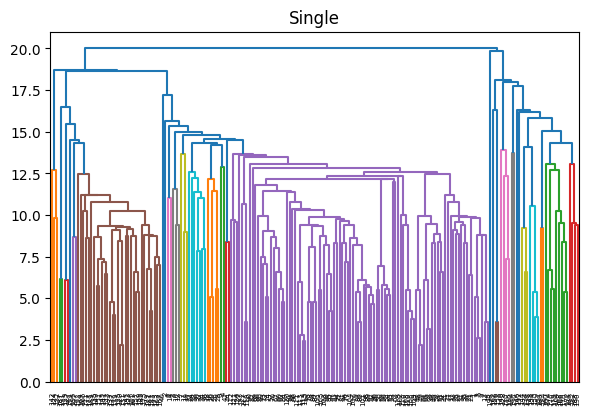

In [7]:
hc.dendogram(linkage_matrix)

1 min


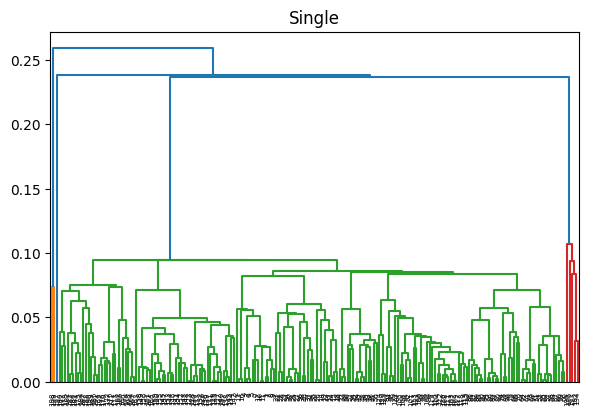

1 max


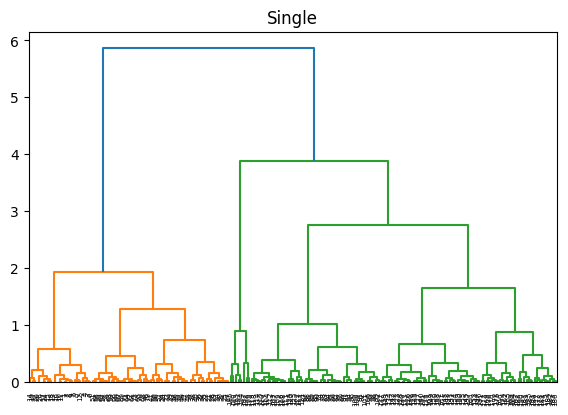

1 average


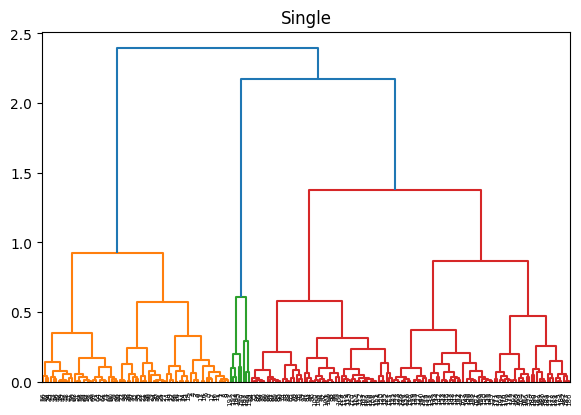

1 centroid


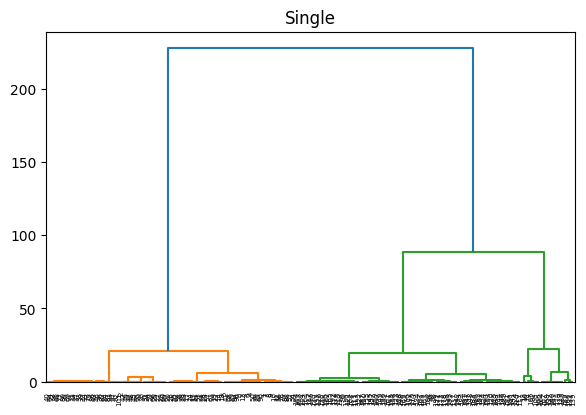

2 min


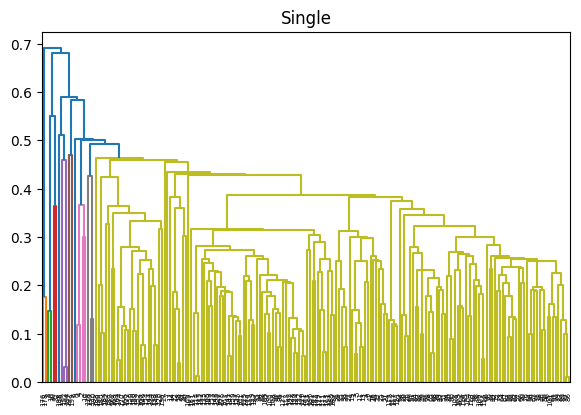

2 max


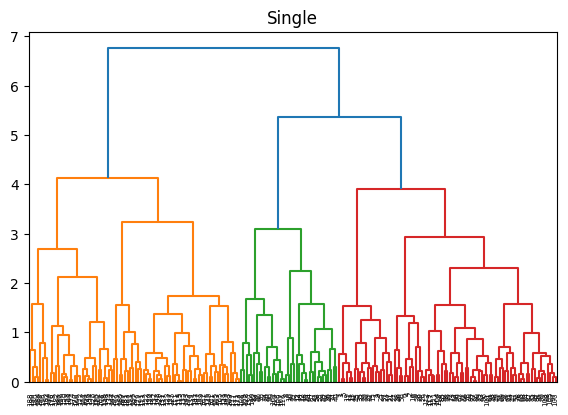

2 average


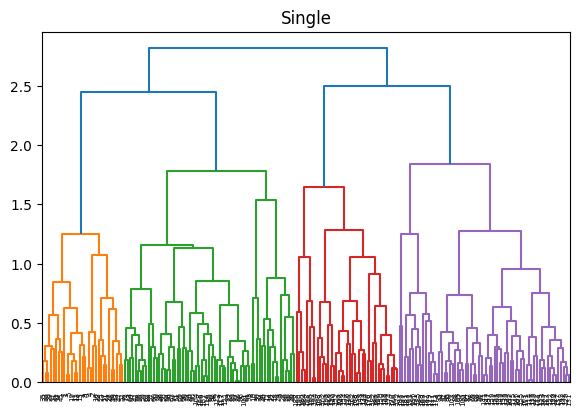

2 centroid


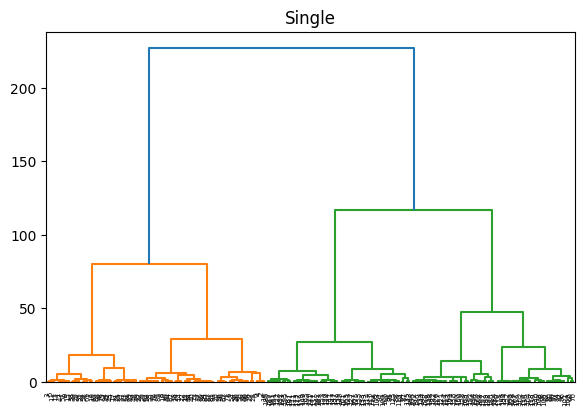

3 min


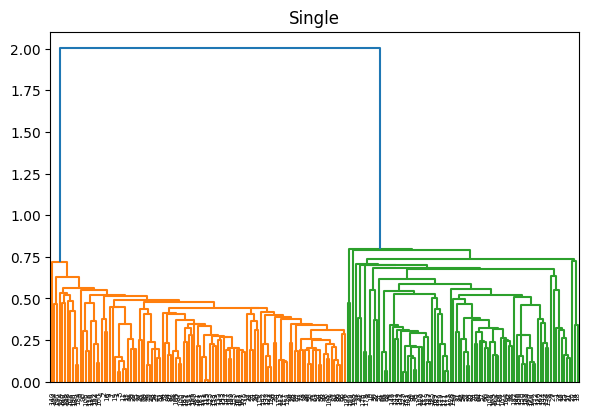

3 max


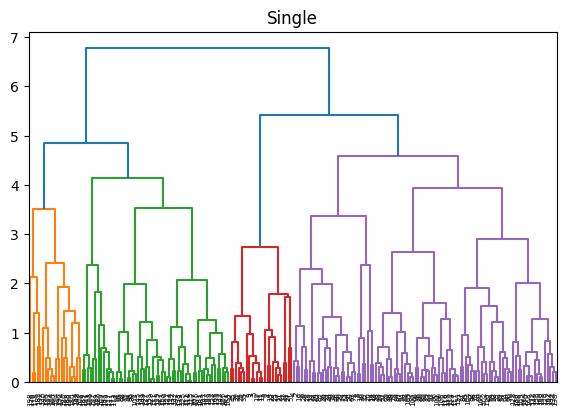

3 average


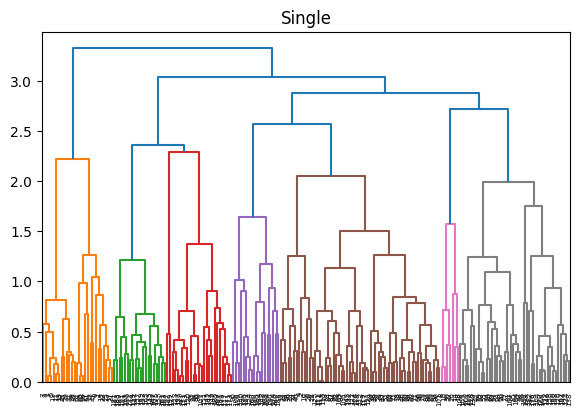

3 centroid


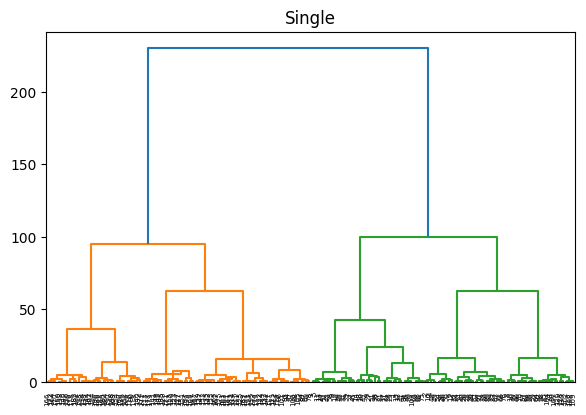

4 min


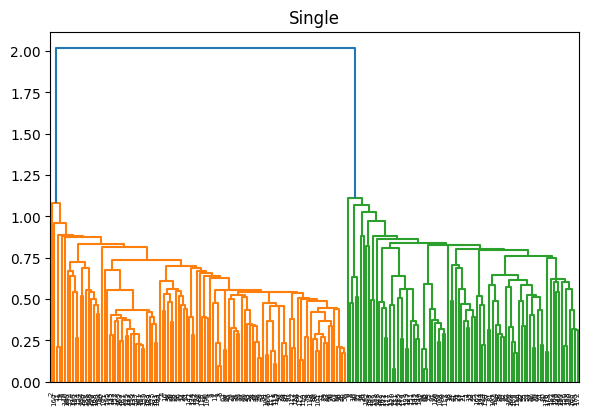

4 max


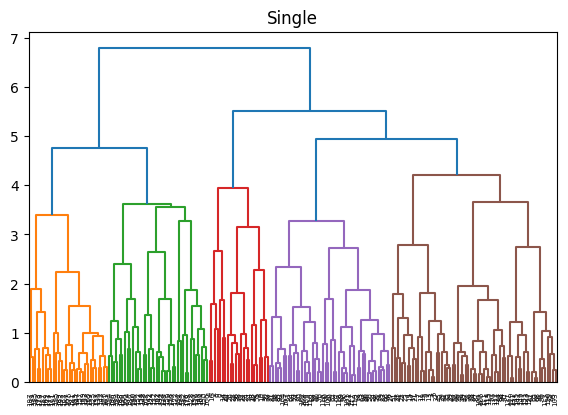

4 average


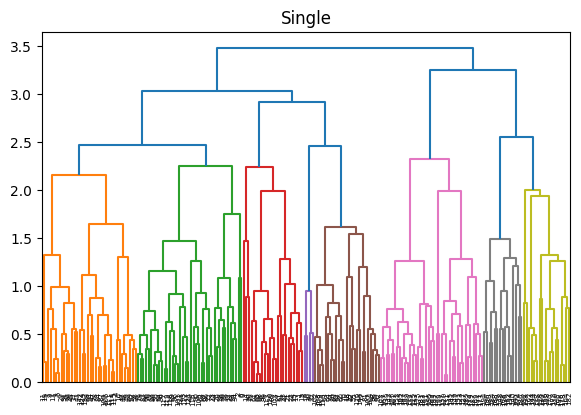

4 centroid


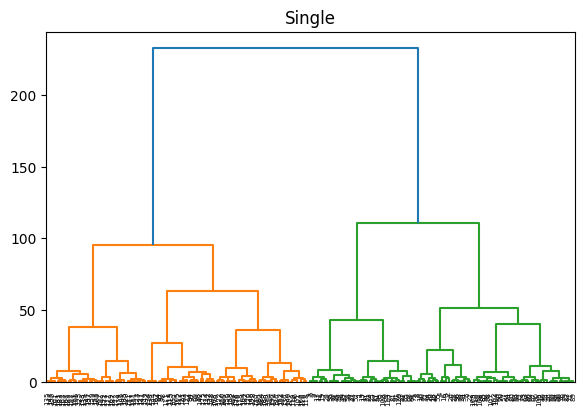

5 min


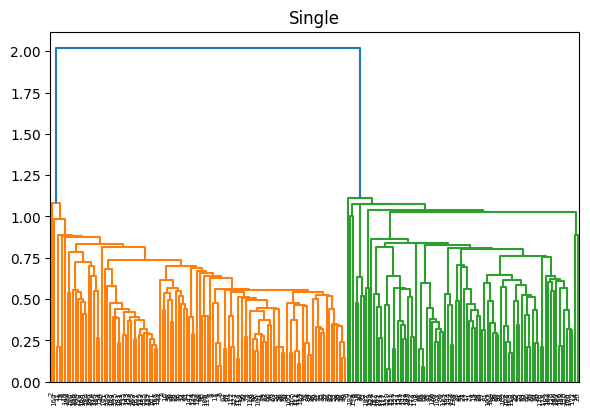

5 max


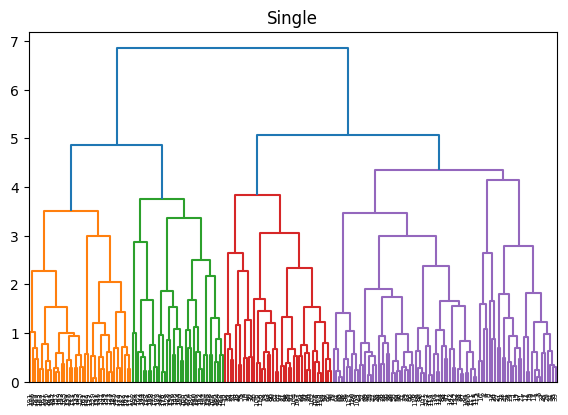

5 average


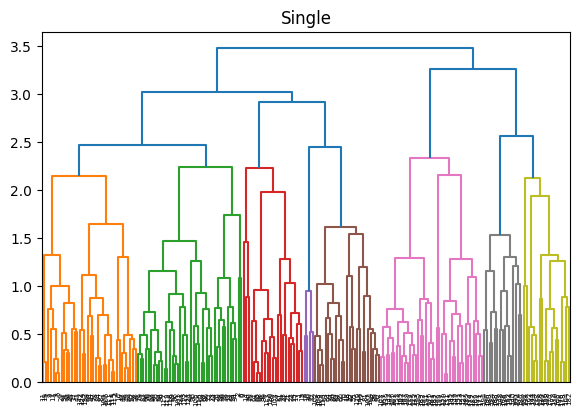

5 centroid


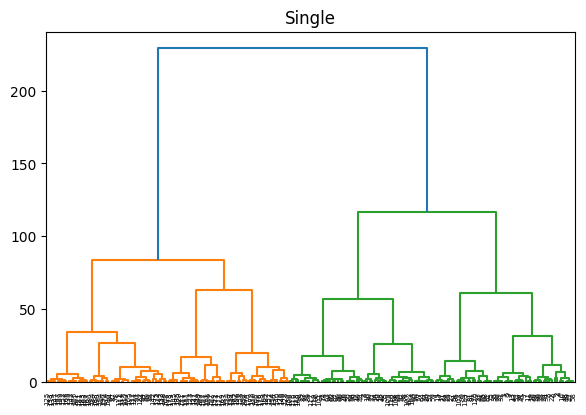

In [8]:
for features in range(1, 6):
    for type in ["min", "max", "average", "centroid"]:
        cumulative_explained_variances, principle_components = pca(data,[],features)
        linkage_matrix = hc.linkages(principle_components, type)
        print(features, type)
        hc.dendogram(linkage_matrix)

In [9]:
csv_file_path = './SMAI-Dataset-gene-expression/gene.csv'
with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)
    data = []
    for row in csv_reader:
        data.append(row)
    data = data[1:]
    data = np.array(data)
    data = data.astype(float)

1 min


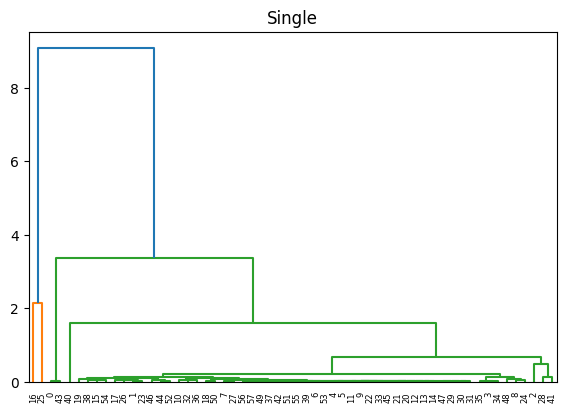

1 max


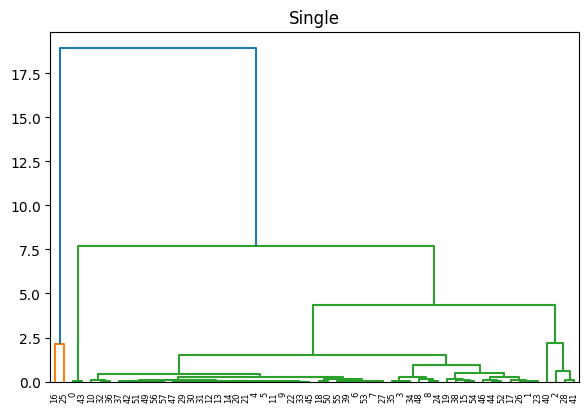

1 average


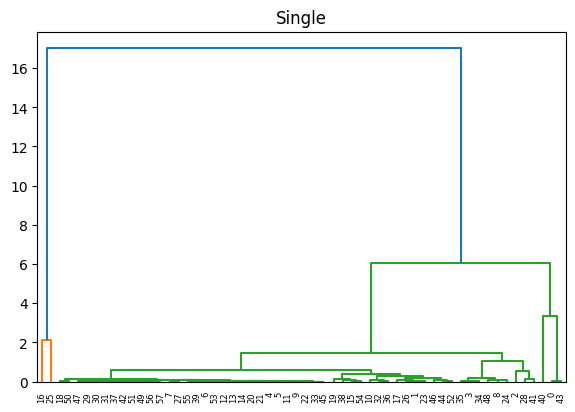

1 centroid


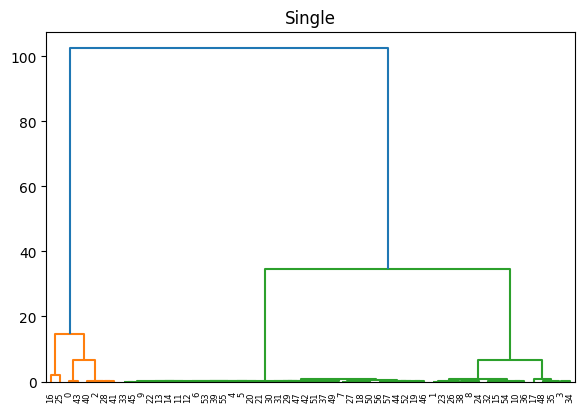

2 min


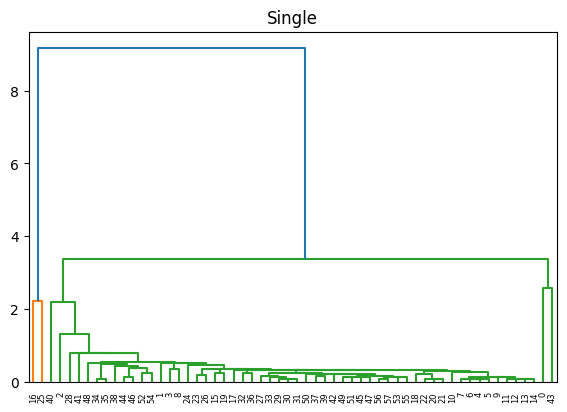

2 max


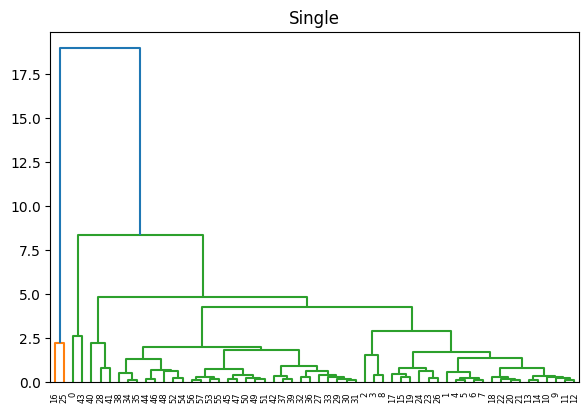

2 average


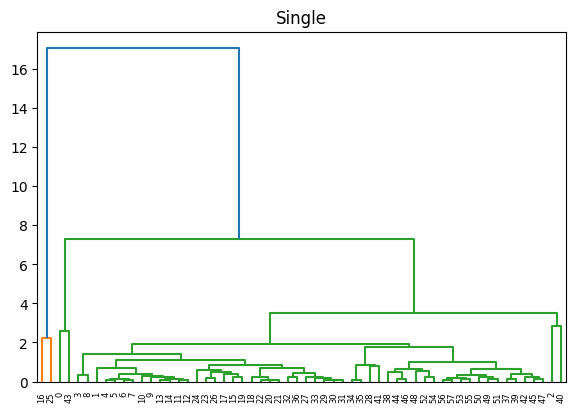

2 centroid


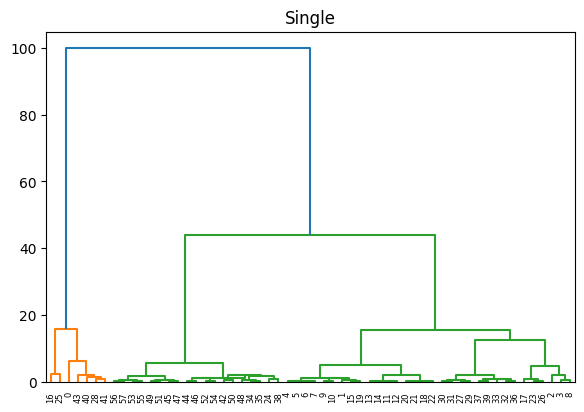

3 min


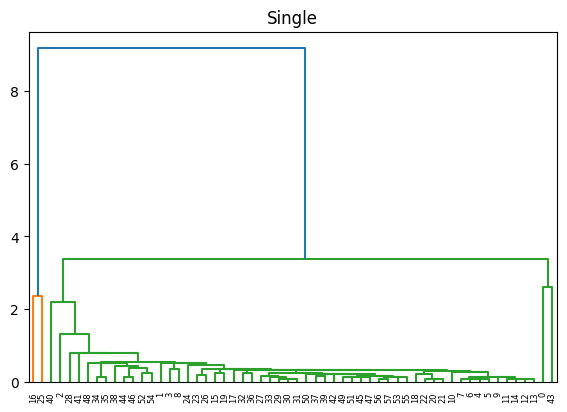

3 max


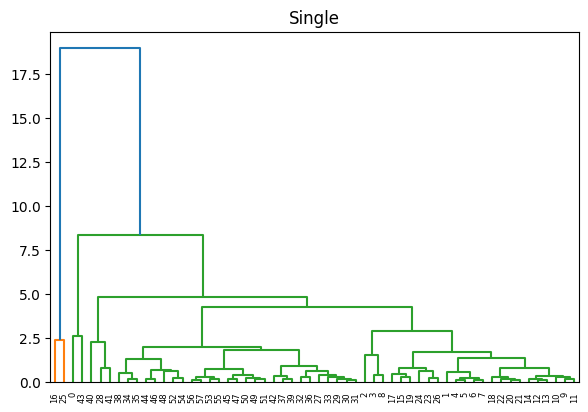

3 average


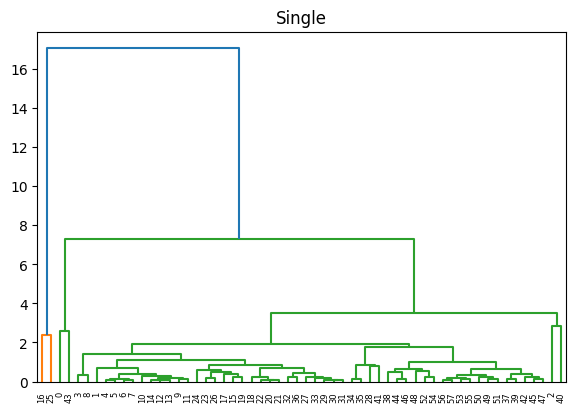

3 centroid


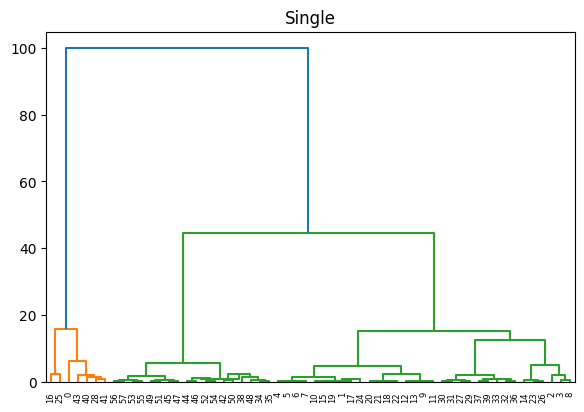

4 min


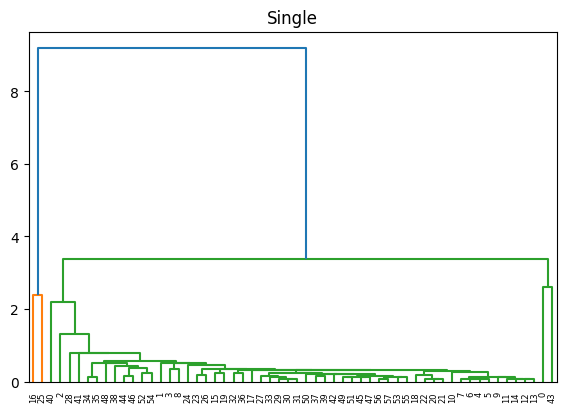

4 max


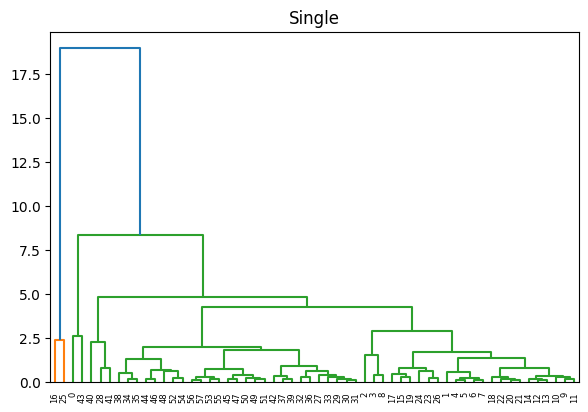

4 average


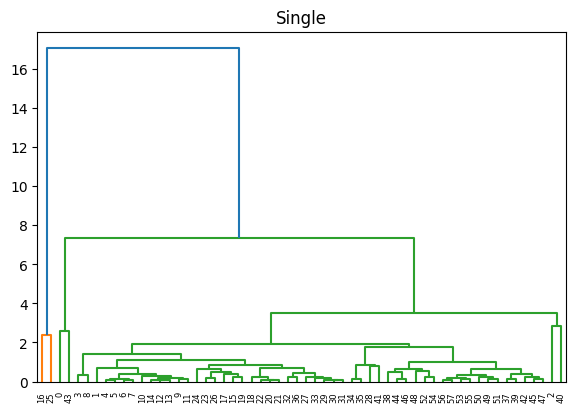

4 centroid


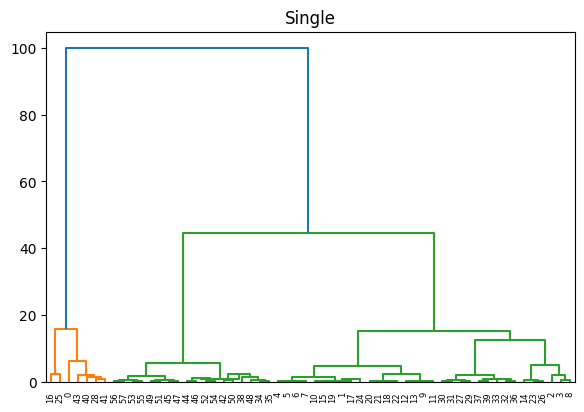

5 min


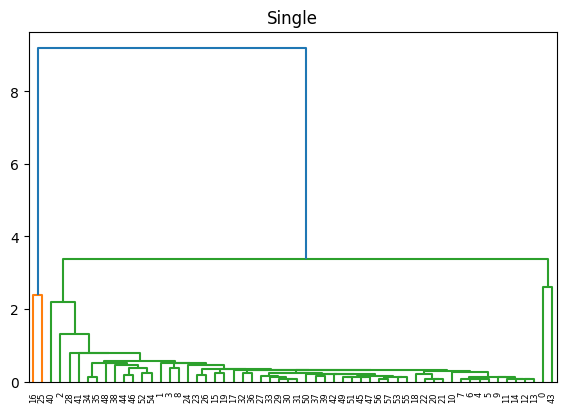

5 max


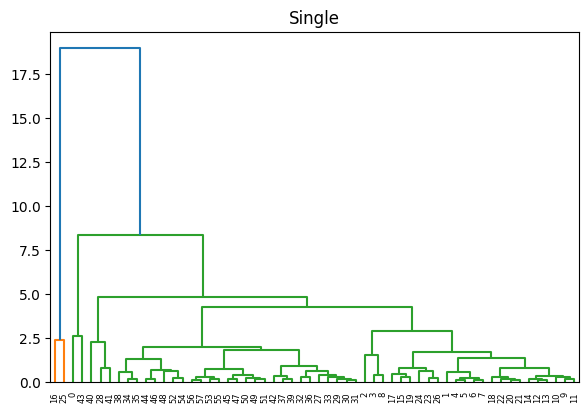

5 average


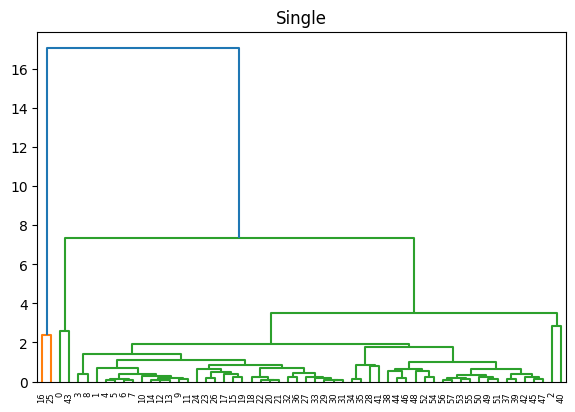

5 centroid


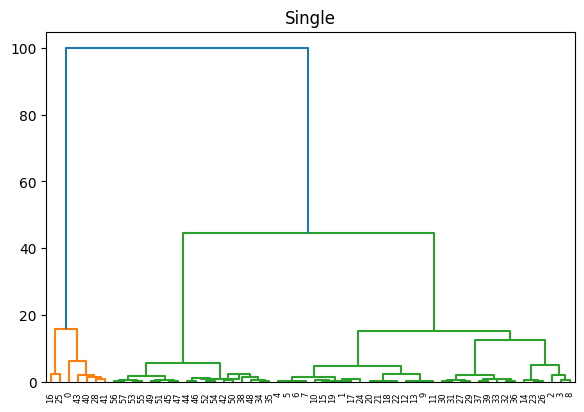

6 min


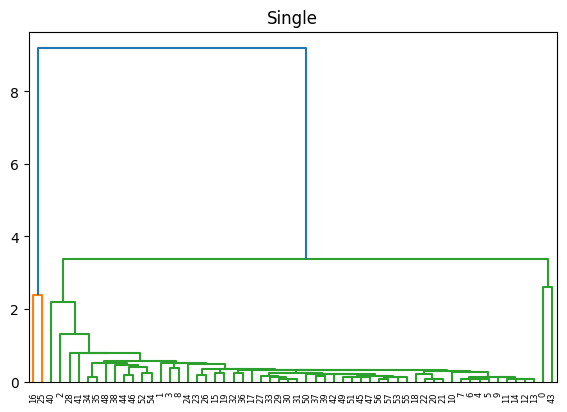

6 max


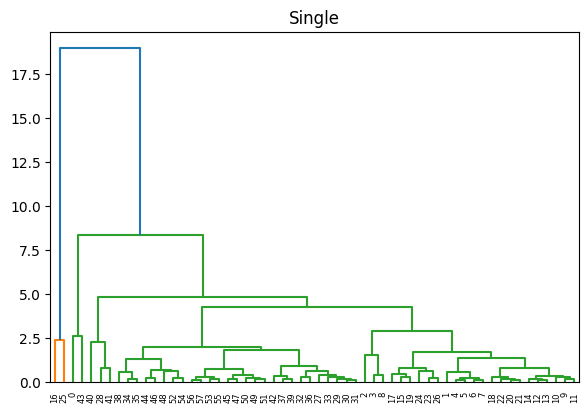

6 average


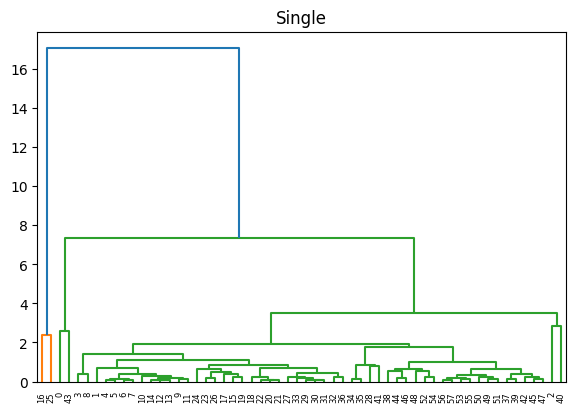

6 centroid


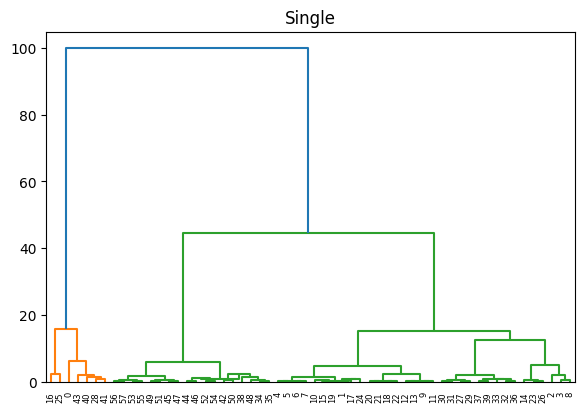

7 min


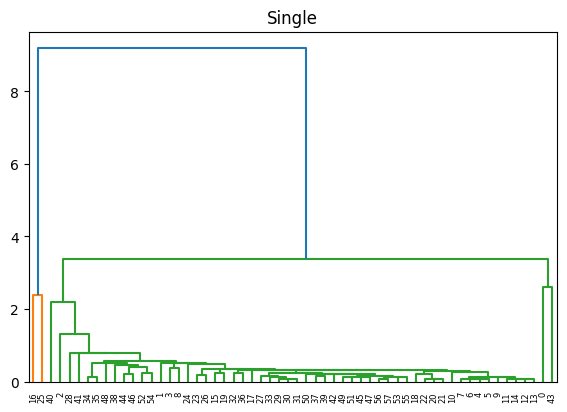

7 max


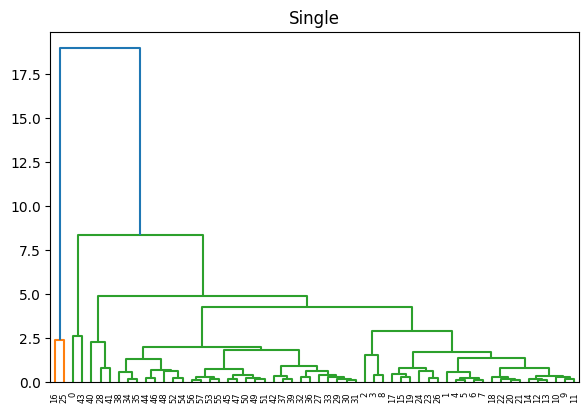

7 average


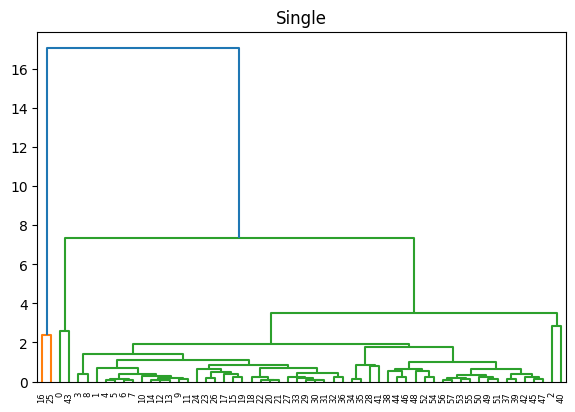

7 centroid


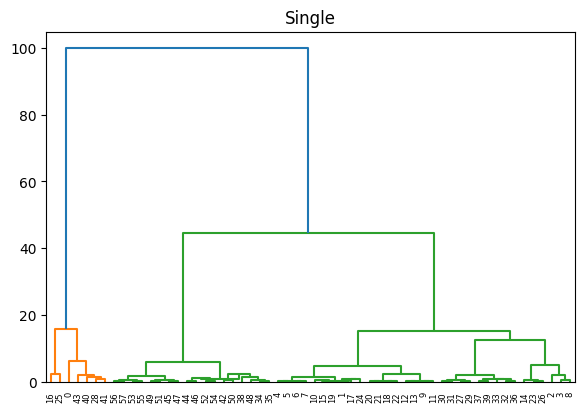

8 min


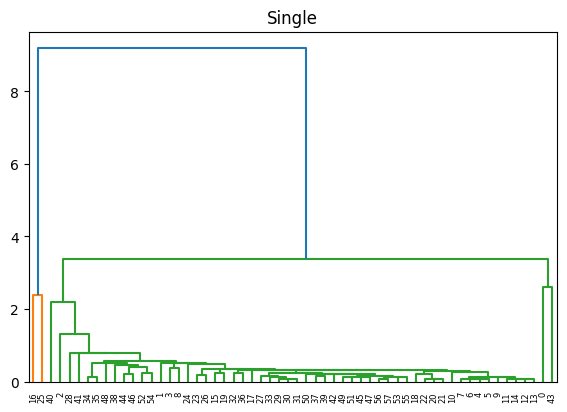

8 max


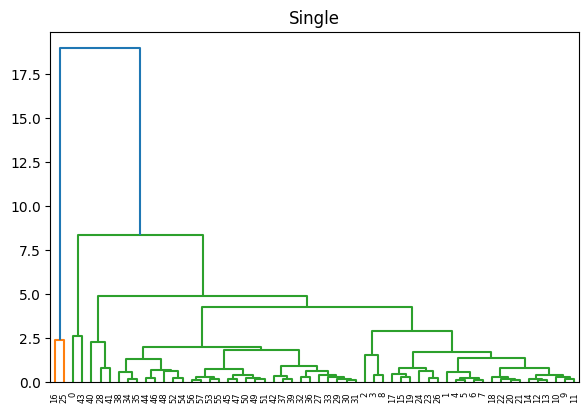

8 average


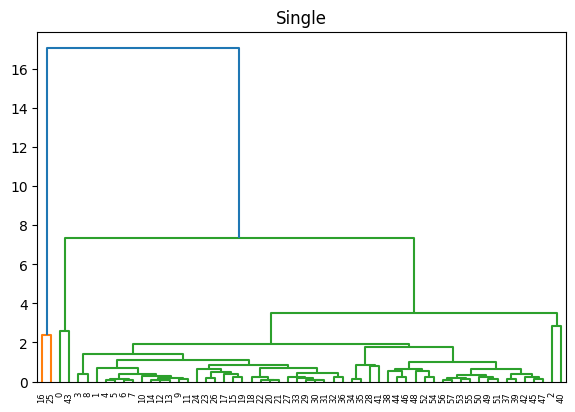

8 centroid


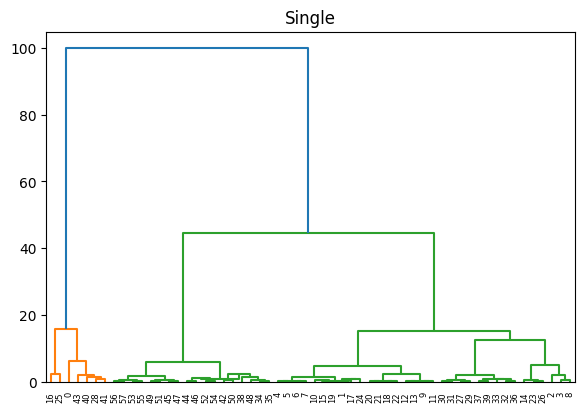

9 min


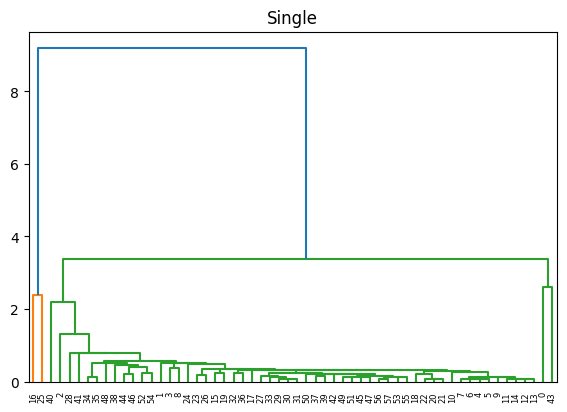

9 max


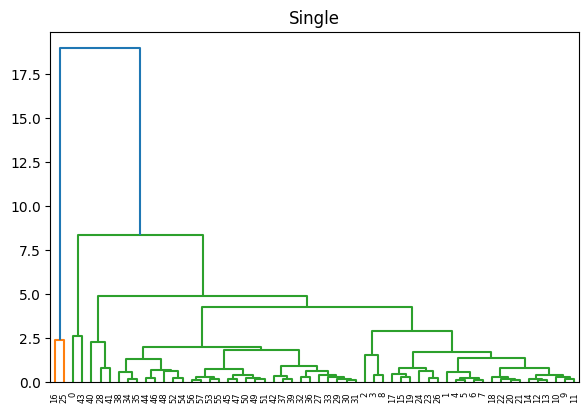

9 average


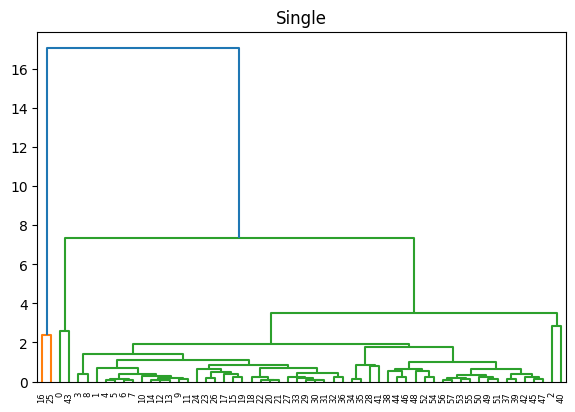

9 centroid


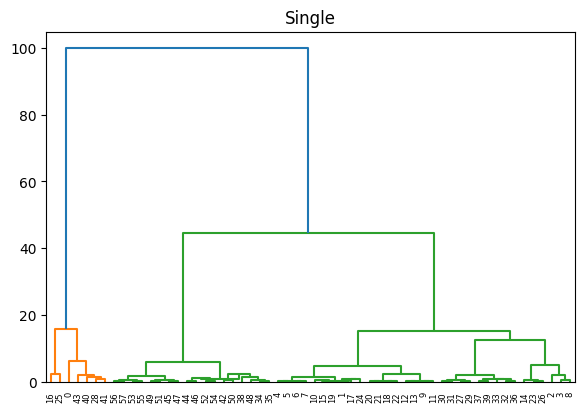

10 min


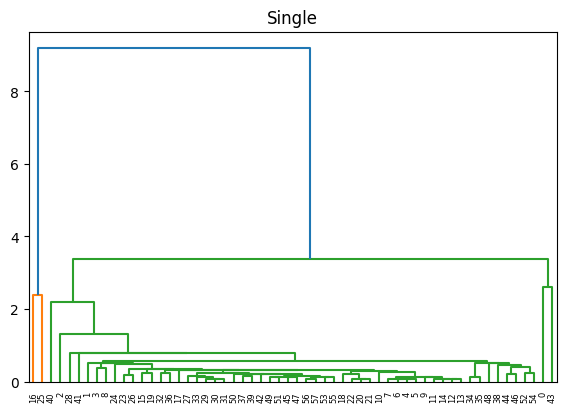

10 max


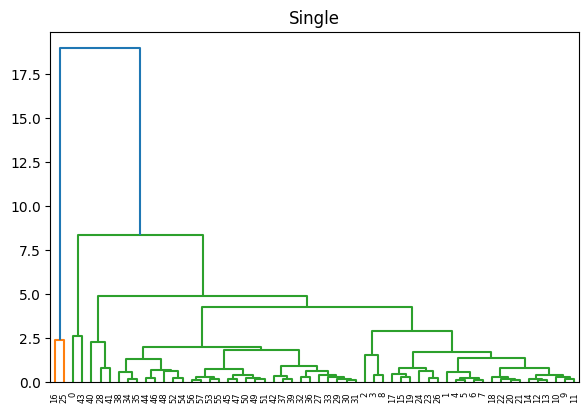

10 average


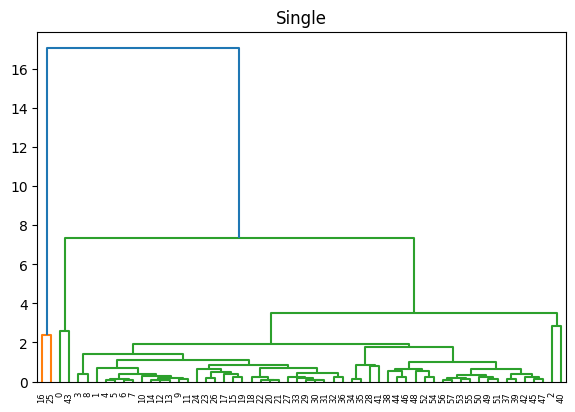

10 centroid


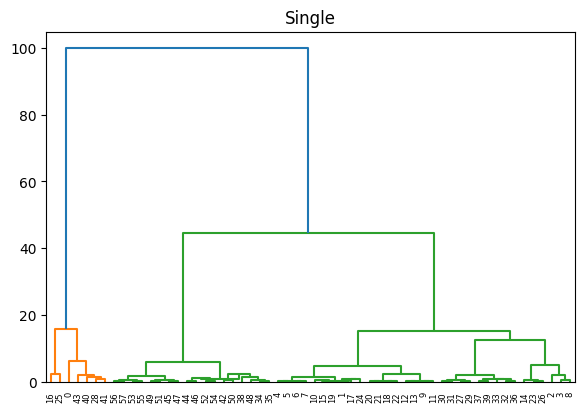

11 min


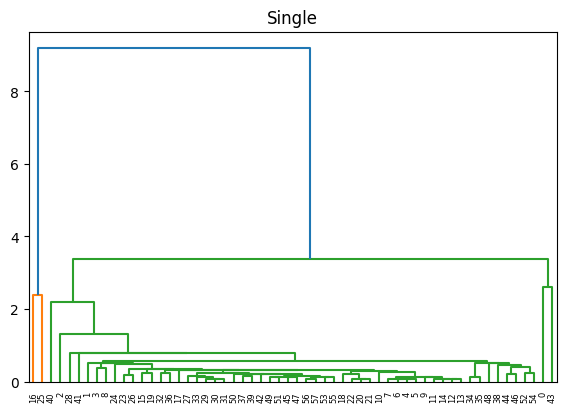

11 max


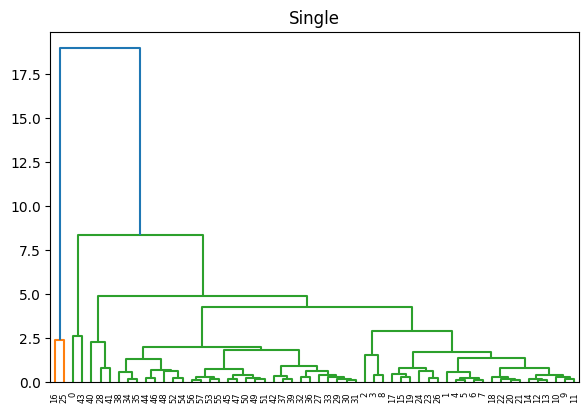

11 average


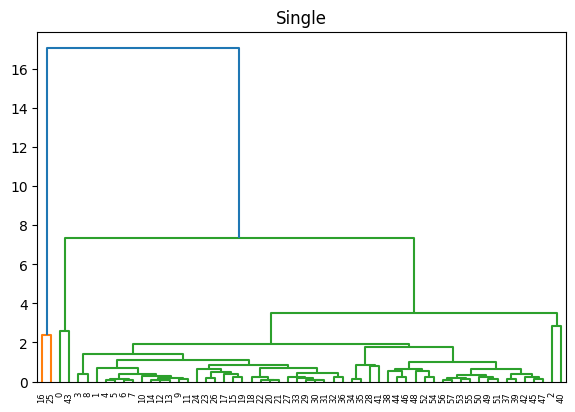

11 centroid


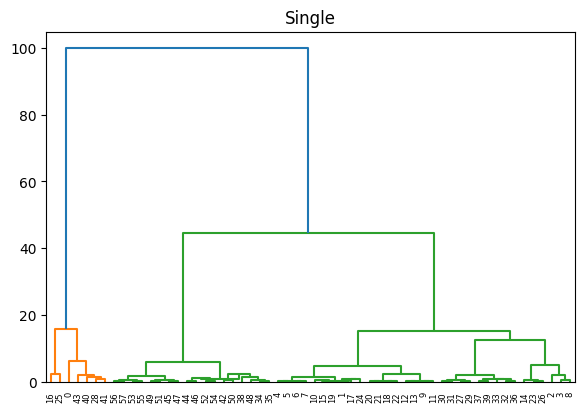

12 min


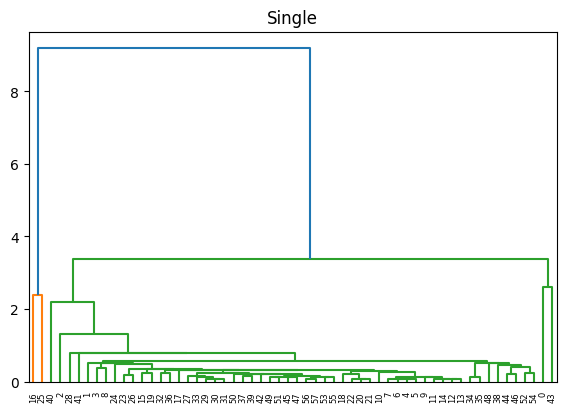

12 max


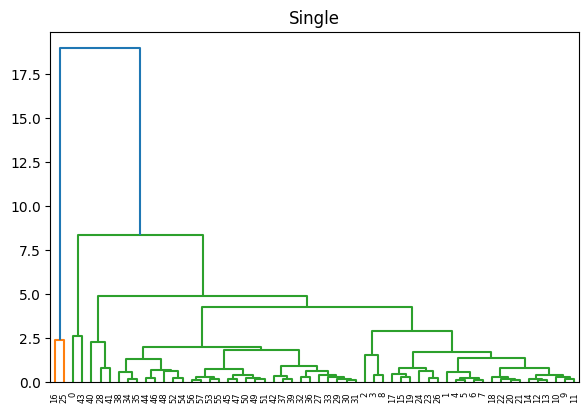

12 average


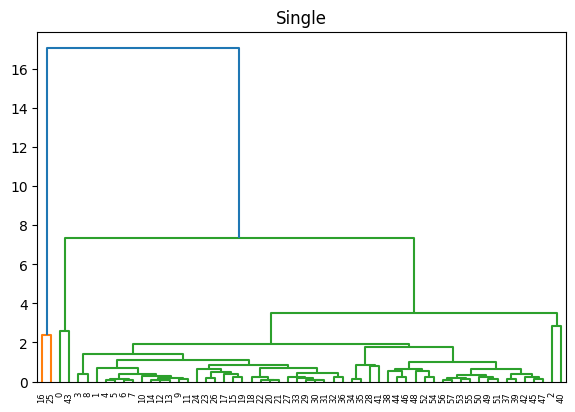

12 centroid


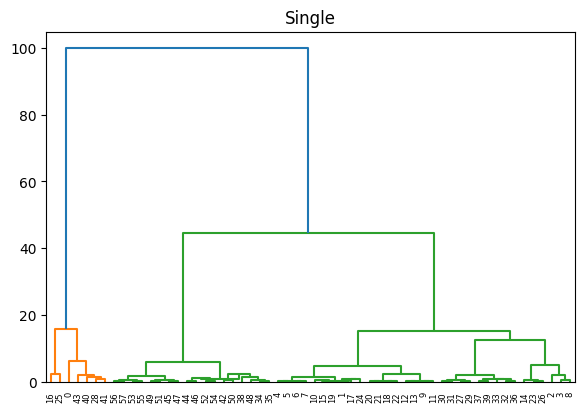

13 min


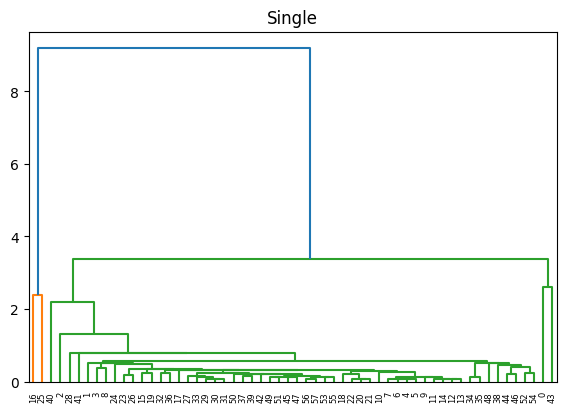

13 max


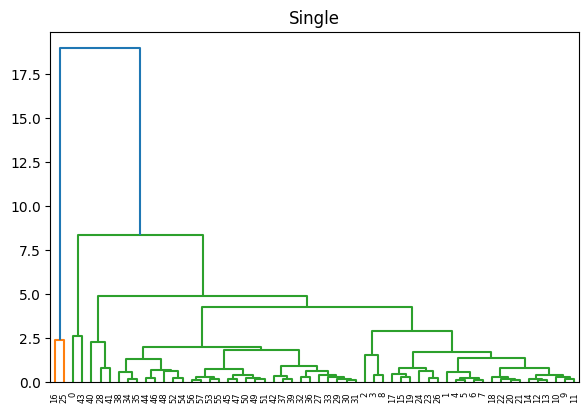

13 average


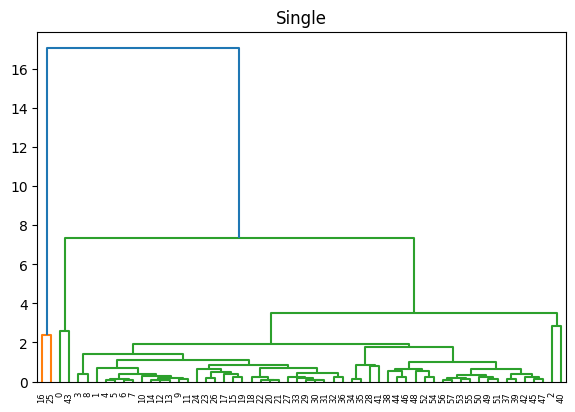

13 centroid


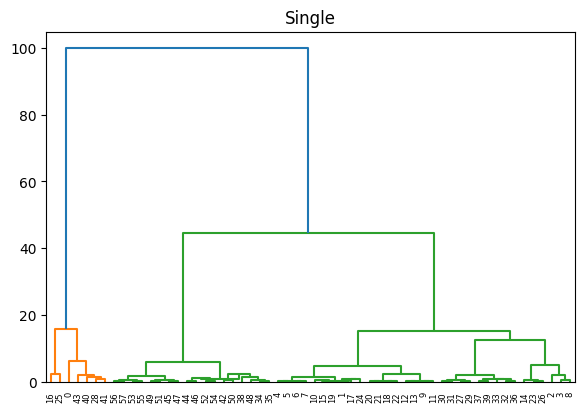

In [10]:
for features in range(1, 14):
    for type in ["min", "max", "average", "centroid"]:
        cumulative_explained_variance, principle_components = pca(data,[],features)
        linkage_matrix = hc.linkages(principle_components, type)
        print(features, type)
        hc.dendogram(linkage_matrix)